In [25]:
#import the various different libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
#load the dataa sets, make sure they read correctly
species=pd.read_csv("species_info.csv")
print(species.head())
observations=pd.read_csv("observations.csv")
print(observations.head())


  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  
            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               

In [18]:
#Question 1: How many species are endangered?
endangered_species=len(species[species["conservation_status"] == "Endangered"])
print("The number of endangered species is",endangered_species)


The number of endangered species is 16


In [22]:
#Question 2: How many species are species of concern
species_of_concern=len(species[species["conservation_status"] == "Species of Concern"])
print("The number of species of concern is", species_of_concern)

The number of species of concern is 161


In [30]:
#Question 3: How many species are threatened?
threatened_species=len(species[species["conservation_status"] == "Threatened"])
print("The number of threatened species is", threatened_species)

The number of threatened species is 10


In [32]:
#Question 4: How many species are in recovery? 
recovery_species=len(species[species["conservation_status"] == "In Recovery"])
print("The number of recovery species is", recovery_species)

The number of recovery species is 4


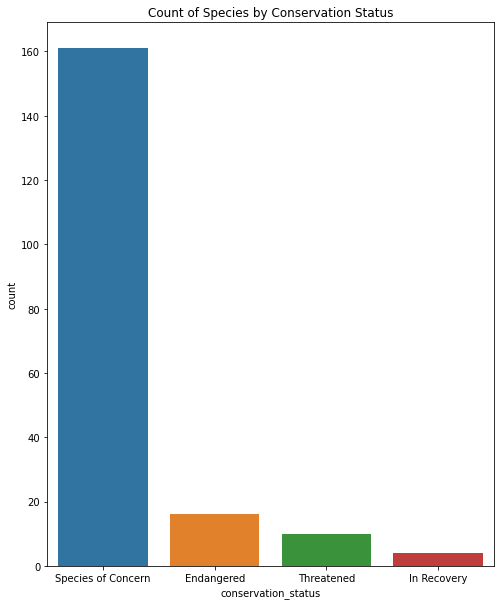

In [85]:
#Question 5 Visualise the number of species of each Conservation status
plt.figure(figsize=(8,10))
sns.countplot(data=species,x="conservation_status")
plt.title("Count of Species by Conservation Status")
plt.show()

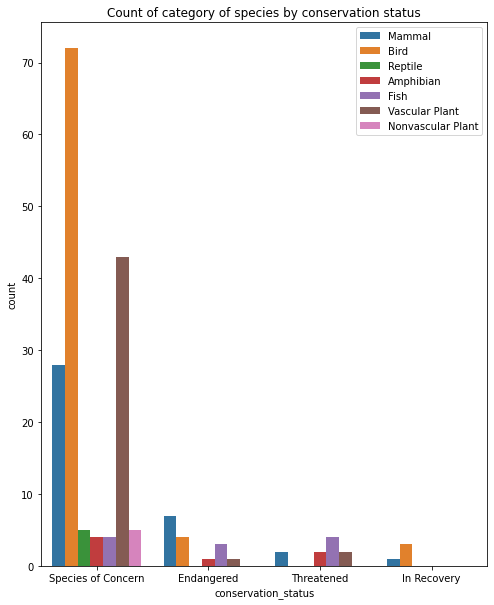

In [84]:
#Question 6: Which category has the most endangered, species of concern, threatened and In Recovery
plt.figure(figsize=(8,10))
sns.countplot(data=species,x="conservation_status",hue="category")
plt.title("Count of category of species by conservation status")
plt.legend(loc=1)
plt.show()

In [46]:
#Question 7: How many parks are there? Names of the parks?
num_of_parks=len(observations.park_name.unique())
park_names=observations.park_name.unique()
print(num_of_parks)
print(park_names)

4
['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


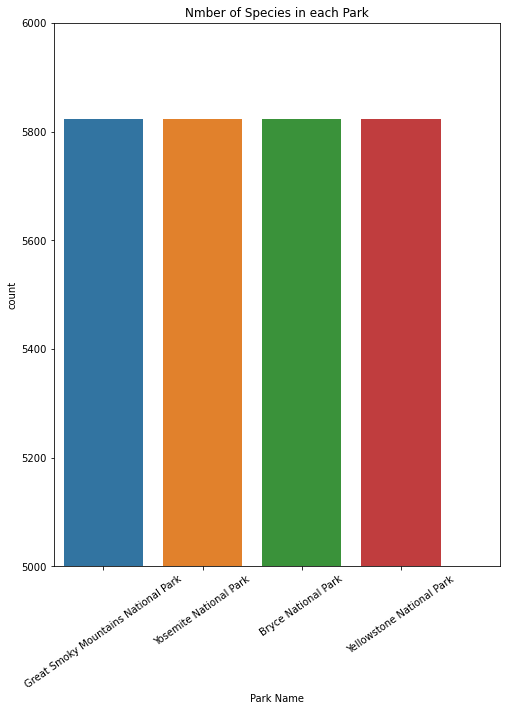

In [56]:
#Question 8: Which park has the most animals
plt.figure(figsize=(8,10))
ax=sns.countplot(data=observations,x="park_name")
plt.title("Nmber of Species in each Park")
plt.axis([-0.5,4,5000,6000])
plt.xlabel("Park Name")
ax.set_xticklabels(ax.get_xticklabels(),rotation=35)
plt.show()

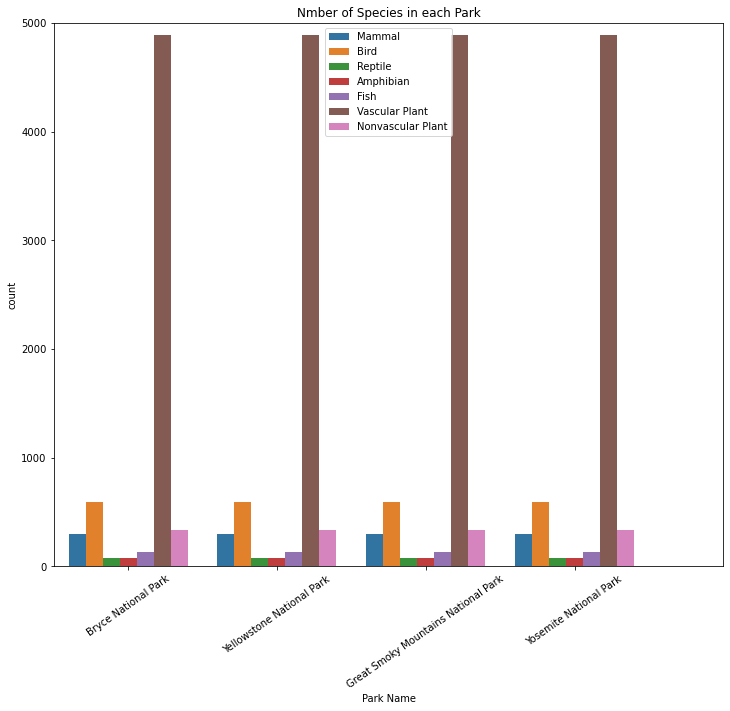

In [66]:
#Question 9: Which park has the most animals broken out by category?
merged_df=pd.merge(species,observations, on="scientific_name")
plt.figure(figsize=(12,10))
ax=sns.countplot(data=merged_df,x="park_name",hue="category")
plt.title("Nmber of Species in each Park by Category")
plt.axis([-0.5,4,0,5000])
plt.xlabel("Park Name")
ax.set_xticklabels(ax.get_xticklabels(),rotation=35)
plt.legend(loc=9)
plt.show()

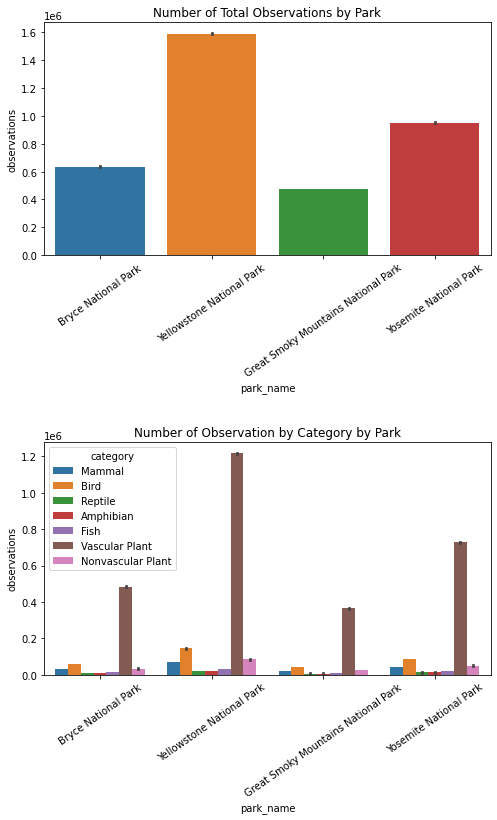

In [83]:
#Question 10 Which Park has the most observations?
plt.figure(figsize=(8,12))
plt.subplot(2,1,1)
plt.subplots_adjust(hspace=0.8)
ax=sns.barplot(data=merged_df,x="park_name",y="observations",estimator=sum)
ax.set_xticklabels(ax.get_xticklabels(),rotation=35)
plt.title("Number of Total Observations by Park")
plt.subplot(2,1,2)
ax=sns.barplot(data=merged_df,x="park_name",y="observations",estimator=sum,hue="category")
ax.set_xticklabels(ax.get_xticklabels(),rotation=35)
plt.title("Number of Observation by Category by Park")
        
plt.show()